<a href="https://colab.research.google.com/github/Vaibhav67979/MachineLearning/blob/main/TensorFlow/SeqNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creating a Neural Network

##Import

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

##Dataset

**MNIST Fashion Dataset** : This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

So we've got 60,000 images that are made up of 28x28 pixels (784 in total).

In [5]:
train_images[0,23,23]

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers 0-9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

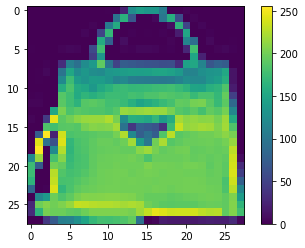

In [8]:
plt.figure()
plt.imshow(train_images[156])
plt.colorbar()
plt.grid(False)
plt.show()

this is what our images in the dataset look like.

##Data Preprocessing 

Preprocessing simply refers to perform series of operations to transform or change data so that the model can understand it.

This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Note that applying the same preprocessing operation to both the training and testing data is necessary.


##Building the model

here we define the architecture of our model including type and number of layers, as well as the activation funtions required.

 We are going to use a keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # layer 1 - input layer
    keras.layers.Dense(128, activation = "relu"), # layer 2 - hidden layer
    keras.layers.Dense(10, activation = "softmax") # layer 3 - ouput layer 
])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

##Compiling the model

here we pick the optimizer, loss and the metrics

these values can be changed depending on the desired results - called hyperparameter tuning.

activation functions, type and number of connections are also hyperparameters that can be tuned.

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Training the model



In [12]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5044 - accuracy: 0.8228
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3726 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3359 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3144 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2580 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2474 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

epochs is also a hyperparameter which can result in overfitting if it's too large.

##Evaluating the model

We can do this quite easily using another builtin method from keras.

The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3318 - accuracy: 0.8866
Test accuracy: 0.8866000175476074


You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as **overfitting**.

Overfitting occurs when the model fits more data than required, and it tries to capture each and every datapoint fed to it. Hence it starts capturing noise and inaccurate data from the dataset, which degrades the performance of the model.

if the model is fed the same data too many times it kinda memorizes the datapoints and when it encounters new test data it might predict wrongly resulting in lesser accuracy.


##Predictions

To make predictions we simply need to pass an array of data in the form we've specified in the input layer to ```.predict()``` method.

In [14]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


if we look at the results of predictions it returns an array of arrays which is essentially the array of probabilities of the each object in the test images belonging to each class

In [15]:
predictions

array([[5.8245342e-07, 1.4058918e-10, 1.4625828e-09, ..., 1.7044146e-02,
        7.6652618e-08, 9.7695571e-01],
       [1.2285187e-04, 5.0472317e-11, 9.9719876e-01, ..., 3.7751194e-16,
        2.8023361e-11, 1.4423825e-17],
       [3.9271950e-07, 9.9999958e-01, 1.0856790e-09, ..., 5.9398746e-23,
        2.1077287e-11, 2.4939835e-18],
       ...,
       [8.5452202e-06, 8.3476476e-11, 1.4743381e-06, ..., 6.5337985e-11,
        9.9949557e-01, 1.8010802e-13],
       [1.4381532e-08, 9.9999303e-01, 1.3831501e-09, ..., 1.4327777e-17,
        1.0871224e-09, 7.8869465e-15],
       [1.7253649e-05, 3.4124581e-09, 7.1812087e-07, ..., 7.0919603e-04,
        3.3308097e-05, 9.2581263e-07]], dtype=float32)

the ``` .predict ``` method takes in an argument as an array so we pass the whole test_images array as the argument instead of a single element. Though we can also predict for just a single element but we will have to pass it as an array.

```
predictions = model.predict([test_images[0]])
```
or else we can predict for the whole array and just print out the prediction for the element we need.



In [16]:
predictions[0]

array([5.8245342e-07, 1.4058918e-10, 1.4625828e-09, 2.3304011e-11,
       3.8667043e-09, 5.9990045e-03, 4.7173785e-07, 1.7044146e-02,
       7.6652618e-08, 9.7695571e-01], dtype=float32)

Suppose if we want to predict the class of the 1st element i.e, the index 0, we can predict for the whole array and jjust print out the prediction for the 0th index, but it returns out an array of probabilities, so if we wan't to get the value with the highest score we can use a useful function from numpy called argmax(). This simply returns the index of the maximium value from a numpy array and we can map it to the class names.

In [17]:
print(class_names[np.argmax(predictions[0])])

Ankle boot


we can verify it visually by checking out the actual image

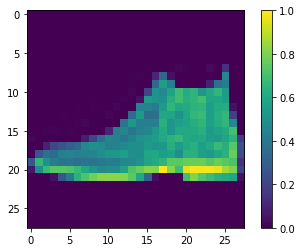

In [18]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

##Verifying Predictions

Pick a number: 0
1/1 [==============================] - 0s 18ms/step


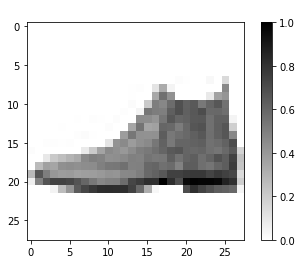

In [20]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
